In [2]:
#2nd Approach
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read the image
image = cv2.imread("../image.jpg")

In [4]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [6]:
print(pixel_values.shape)

(65536, 3)


In [7]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [8]:
# number of clusters (K)
k = 10
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [9]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [10]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

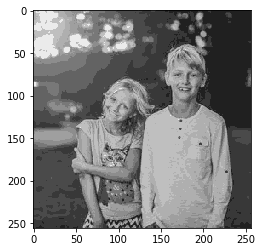

In [11]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

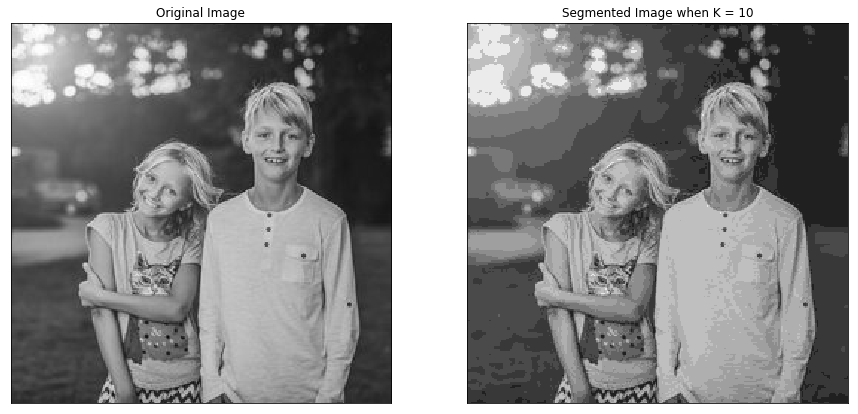

In [12]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(segmented_image)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()